# Практическая работа №5

Выполнил студент группы М06-106н Кочетков Дмитрий Андреевич.

## Постановка задачи

Необходимо выполнить все следующие задачи:

1. Сконструировать класс `BinaryHeap`, реализующий следующие операции над двоичной max-кучей:
- `push` - добавление элемента в кучу;
- `pop` – получить значение и удалить корневой элемент из кучи.
- (дополнительное задание – по желанию) Реализовать конструктор класса, которому в качестве параметра передается список элементов, из которых нужно построить кучу.

2. Реализовать класс `TaskQueue` для работы со списком задач. Для каждой задачи задается название и приоритет (число от 1 до 4: 1 – низкий приоритет, 2 – средний приоритет, 3 – высокий приоритет, 4 – критическая задача). Класс должен обеспечивать возможность добавления задач в очередь, извлечение задачи из очереди, смену приоритета задачи из очереди. Для реализации использовать двоичную кучу. Для работы с двоичной кучей использовать библиотеку `heapq`.

3. Сравнить время работы очереди с приоритетом на основе 1) отсортированного списка (list) и 2) двоичной кучи (библиотека `heapq`). Для этого рассчитать время заполнения и извлечения всех данных из очереди с приоритетом с использованием обоих методов (списка и кучи) на списках разной длины. Построить на одном графике зависимости времени работы с очередью от размера списка для обоих реализаций. Сделать вывод.


## Задача 1

### Реализация BinaryHeap

In [40]:
"""
Двоичная max-куча на основе отсортированного списка.
"""
class BinaryHeap:
    def __init__(self):
        self.elements = []

    """
    Находит value в куче и возвращает индекс его родительской вершины.
    """
    def parentIndex(self, value):
        index = self.elements.index(value)
        result = (index - 1) // 2
        if result >= 0 and result < len(self.elements):
            return result

        return None

    """
    Находит value в куче и возвращает индекс его левого потомка.
    """
    def leftChildIndex(self, value):
        index = self.elements.index(value)
        result = 2 * index + 1
        if result >= 0 and result < len(self.elements):
            return result

        return None

    """
    Находит value в куче и возвращает индекс его правого потомка.
    """
    def rightChildIndex(self, value):
        index = self.elements.index(value)
        result = 2 * index + 2
        if result >= 0 and result < len(self.elements):
            return result

        return None

    def __swap__(self, i, j):
        self.elements[i], self.elements[j] = self.elements[j], self.elements[i]

    """
    Восстанавливает инвариантность данных в куче
    """
    def __bottom_up__(self, index):
        root_index = self.parentIndex(self.elements[index])
        
        if root_index == None:
            return
    
        if self.elements[index] > self.elements[root_index]:
            self.__swap__(index,root_index)
            self.__bottom_up__(root_index)
    
    """
    Добавление нового значения в кучу.
    """
    def push(self, value):
        self.elements.append(value)
        self.__bottom_up__(len(self.elements) - 1)

    def __str__(self, index = None, level=0):
        if index == None:
            # index = len(self.elements) - 1
            index = 0
        
        value = self.elements[index]
        ret = "   " * level + repr(value) + "\n"
        if self.leftChildIndex(value) != None:
            ret += self.__str__(self.leftChildIndex(value), level+1)
        if self.rightChildIndex(value) != None:
            ret += self.__str__(self.rightChildIndex(value), level+1)
        return ret

    def __repr__(self):
        return self.__str__(level=0)

In [41]:
maxHeap = BinaryHeap()
maxHeap.push(15)
maxHeap.push(5)
maxHeap.push(3)
maxHeap.push(17)
maxHeap.push(10)
maxHeap.push(84)
maxHeap.push(19)
maxHeap.push(6)
maxHeap.push(22)
maxHeap.push(9)
print(maxHeap)

84
   22
      15
         5
         6
      10
         9
   19
      3
      17



### Тестирование BinaryHeap

## Задача 2

In [4]:
from heapq import heappush, heappop, heapify

class Task:
    def __init__(self, name: str, priority: int):
        if not isinstance(priority, int):
            raise ValueError

        if priority < 1 or priority > 4:
            raise ValueError
        
        self.id = None
        self.name = name
        self.priority = priority
    
    def __lt__(self, other):
        return self.priority < other.priority

    def __str__(self):
        return '[ID: {}, priority: {}] {}'.format(self.id, self.priority, self.name)

    def __repr__(self):
        return '[ID: {}, priority: {}] {}'.format(self.id, self.priority, self.name)

class TaskQueue:
    def __init__(self):
        self.tasks = []
        self.next_id = 1

    def insert(self, task: Task):
        heappush(self.tasks, task)
        task.id = self.next_id
        self.next_id += 1

    def pop(self):
        return heappop(self.tasks)
    
    def changePriority(self, id: int, new_priority: int):
        selected_task = None
        for task in self.tasks:
            if task.id == id:
                selected_task = task

        selected_task.priority = new_priority
        heapify(self.tasks)

    def __str__(self):
        result = ''
        for item in sorted(self.tasks):
            result += str(item) + '\n'
        return result

    def __repr__(self):
        return self.__str__()

In [4]:
# Названия тасков не смог придумать, поэтому взял из GitHub-репозитория Angular
queue = TaskQueue()
queue.insert(Task('control.hasError() return unexpected value', 3))
queue.insert(Task('Expose flushPeriodic from FakeAsync module', 4))
queue.insert(Task('extract-i18n JSON format add support for meaning and description', 2))
queue.insert(Task('Input-Placeholder is empty after resetting a auto-completed input-field in firefox', 4))
queue.insert(Task('ProvideIn singleton service among multiple angular instances', 1))
queue.insert(Task('Animation not working correctly with Angular routing and component reusing (caching)', 3))
queue.insert(Task('Angular.io website is not GDPR compliant', 1))

queue

[ID: 5, priority: 1] ProvideIn singleton service among multiple angular instances
[ID: 7, priority: 1] Angular.io website is not GDPR compliant
[ID: 3, priority: 2] extract-i18n JSON format add support for meaning and description
[ID: 6, priority: 3] Animation not working correctly with Angular routing and component reusing (caching)
[ID: 1, priority: 3] control.hasError() return unexpected value
[ID: 4, priority: 4] Input-Placeholder is empty after resetting a auto-completed input-field in firefox
[ID: 2, priority: 4] Expose flushPeriodic from FakeAsync module

In [5]:
queue.pop()
queue

[ID: 7, priority: 1] Angular.io website is not GDPR compliant
[ID: 3, priority: 2] extract-i18n JSON format add support for meaning and description
[ID: 6, priority: 3] Animation not working correctly with Angular routing and component reusing (caching)
[ID: 1, priority: 3] control.hasError() return unexpected value
[ID: 4, priority: 4] Input-Placeholder is empty after resetting a auto-completed input-field in firefox
[ID: 2, priority: 4] Expose flushPeriodic from FakeAsync module

In [6]:
queue.pop()
queue

[ID: 3, priority: 2] extract-i18n JSON format add support for meaning and description
[ID: 1, priority: 3] control.hasError() return unexpected value
[ID: 6, priority: 3] Animation not working correctly with Angular routing and component reusing (caching)
[ID: 4, priority: 4] Input-Placeholder is empty after resetting a auto-completed input-field in firefox
[ID: 2, priority: 4] Expose flushPeriodic from FakeAsync module

In [7]:
queue.pop()
queue

[ID: 6, priority: 3] Animation not working correctly with Angular routing and component reusing (caching)
[ID: 1, priority: 3] control.hasError() return unexpected value
[ID: 2, priority: 4] Expose flushPeriodic from FakeAsync module
[ID: 4, priority: 4] Input-Placeholder is empty after resetting a auto-completed input-field in firefox

In [8]:
queue.pop()
queue

[ID: 1, priority: 3] control.hasError() return unexpected value
[ID: 4, priority: 4] Input-Placeholder is empty after resetting a auto-completed input-field in firefox
[ID: 2, priority: 4] Expose flushPeriodic from FakeAsync module

In [9]:
queue.changePriority(4, 1)
queue

[ID: 4, priority: 1] Input-Placeholder is empty after resetting a auto-completed input-field in firefox
[ID: 1, priority: 3] control.hasError() return unexpected value
[ID: 2, priority: 4] Expose flushPeriodic from FakeAsync module

## Задача 3

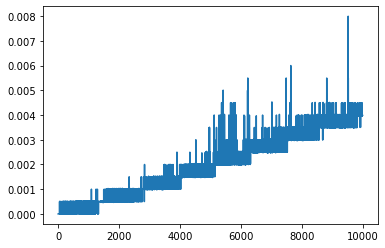

In [21]:
import random
import time
from matplotlib import pyplot as plt

sizes = list()
insertion_time_from_scratch = list()
insertion_time_lib = list()

for size in range(1, 10000):
    sizes.append(size)
    values = random.sample(range(1, 20000), size)

    # heap_from_scratch = BinaryHeap()
    heap_lib = list()

    start_time = time.time()
    for item in values:
        heappush(heap_lib, item)
    
    for i in range(len(heap_lib)):
        heappop(heap_lib)

    insertion_time_lib.append(time.time() - start_time)


plt.plot(sizes, insertion_time_lib)
plt.show()

## Вывод

В ходе практической работы была реализована двоичная куча. Проведено сравнение реализованной кучи с библиотечной реализацией `heapq`.